# Proyek Analisis Data: Bike Sharing
- **Nama:** Nazwa Akilla Zahra
- **Email:** nazwaakillazh@gmail.com
- **ID Dicoding:** MC009D5X0578

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren penggunaan sepeda sepanjang tahun?
- Pertanyaan 2: Bagaimana pengaruh musim dan kondisi cuaca terhadap jumlah pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

#Set style visualisasi
sns.set(style='whitegrid', palette='pastel')

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv berisi data harian jumlah pengguna sepeda.

- Dataset hour.csv berisi data jumlah pengguna sepeda berdasarkan jam.

### Assessing Data

Missing value (Data kosong)

In [4]:
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
Tidak ditemukan nilai null pada kedua dataset

Invalid value (Data tidak masuk akal)

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
dteday pada dataframe day_df perlu diubah dari format string object ke datetime agar bisa dihitung (dilakukan pada proses Cleaning Data)

In [7]:
print("DF day")
print("Season", day_df['season'].unique())  #Ada 1, 2, 3, 4
print("Weather: ", day_df['weathersit'].unique())  #Ada 1, 2, 3

DF day
Season [1 2 3 4]
Weather:  [2 1 3]


**Insight:** 
Tidak ditemukan Invalid Value, day_df tidak punya weather = 4 karena yang diambil nilai rata-rata harian, dan kondisi 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) Jarang mendominasi dibanding kondisi lainnya.

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:** 
dteday pada kedua dataframe perlu diubah dari format string object ke datetime agar bisa dihitung (dilakukan pada proses Cleaning Data)

In [9]:
print("DF hour")
print("Season: ", hour_df['season'].unique())  # Ada 1, 2, 3, 4
print("Weather: ", hour_df['weathersit'].unique())  #Ada 1, 2, 3, 4

DF hour
Season:  [1 2 3 4]
Weather:  [1 2 3 4]


Duplicate data (Data berulang)

In [10]:
print("Duplicate data day:", day_df.duplicated().sum())
print("Duplicate data hour:", hour_df.duplicated().sum())

Duplicate data day: 0
Duplicate data hour: 0


**Insight:**
- Tidak ditemukan data berulang pada dataset day.
- Tidak ditemukan data berulang pada dataset hour.

In [11]:
#Cek apakah ada dteday yang duplikat pada day_df.dteday
duplicates = day_df["dteday"].value_counts()
duplicates = duplicates[duplicates > 1]
print(duplicates)

Series([], Name: count, dtype: int64)


**Insight:**
Tidak ada data yang berulang

Inaccurate Value (Data Tidak Sesuai Observasi)

In [12]:
print("DF day")
print("Angin 0 m/s: ", day_df[day_df['windspeed'] == 0])
print("\nCnt lebih kecil dari casual + registered: ", day_df[day_df['cnt'] < (day_df['casual'] + day_df['registered'])])

DF day
Angin 0 m/s:  Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Cnt lebih kecil dari casual + registered:  Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [13]:
print("DF hour")
print("Angin 0 m/s: ", hour_df[hour_df['windspeed'] == 0])
print("\nCnt lebih kecil dari casual + registered: ", hour_df[hour_df['cnt'] < (hour_df['casual'] + hour_df['registered'])])

DF hour
Angin 0 m/s:         instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17319    17320  2012-12-29       1   1    12  12        0        6   
17320    17321  2012-12-29       1   1    12  13        0        6   
17322    17323  2012-12-29       1   1    12  15        0        6   
17330    17331  2012-12-29       1   1    12  23        0        6   
17350    17351  2012-12-30       1   1    12  19        0        0   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81        0.0     

**Insight:**
Ada 2180 rows dari hour_df yang punya windspeed 0 (tidak ada angin pada jam tertentu normal karena angin tidak akan terus bertiup tiap jam)

Inconsistent Value (Perbedaan Standar)

In [14]:
#Periksa minimum dan maksimum day_df dan hour_df
print(day_df[['dteday']].min())
print(day_df[['dteday']].max())
print("\n",hour_df[['dteday','hr']].min())
print(hour_df[['dteday','hr']].max())
#Range 2011-01-01 00:00:00 -> 2012-12-31 23:00:00

dteday    2011-01-01
dtype: object
dteday    2012-12-31
dtype: object

 dteday    2011-01-01
hr                 0
dtype: object
dteday    2012-12-31
hr                23
dtype: object


In [15]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

#Buat rentang tanggal dari 2011-01-01 sampai 2012-12-31
expected_dates = pd.date_range(start="2011-01-01", end="2012-12-31", freq="D")

#Cari tanggal yang hilang
missing_dates = set(expected_dates) - set(day_df["dteday"])

#Cek hasil
print(f"Jumlah tanggal yang hilang: {len(missing_dates)}")
print("Tanggal yang hilang:", sorted(missing_dates))

Jumlah tanggal yang hilang: 0
Tanggal yang hilang: []


In [16]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
#Menangani ketidakkonsistenan terhadap tanggal yang hilang dalam rentang waktu
#Memeriksa rentang waktu yang hilang antara hour_df.dteday dan hour_df.timestamp
#Membuat rentang waktu yang seharusnya ada
date_range = pd.date_range(start="2011-01-01", end="2013-01-01", freq="h")  # Rentang per jam
date_range = date_range[:-1]  # Menghapus satu data terakhir untuk mendapatkan total 17.544 record (731*24)
expected_hours = len(date_range)

#Membandingkan jumlah waktu yang seharusnya ada dengan jumlah yang ada dalam dataset
print(f"Seharusnya ada {expected_hours} jam, tetapi dataset berisi {len(hour_df)} jam.")

#Memastikan kolom dteday bertipe datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

#Menentukan timestamp berdasarkan dteday dan jam (hr)
hour_df["timestamp"] = hour_df["dteday"] + pd.to_timedelta(hour_df["hr"], unit="h")

#Mengidentifikasi timestamp yang hilang
missing_timestamps = set(date_range) - set(hour_df["timestamp"])

print(f"Jumlah timestamp yang hilang: {len(missing_timestamps)}")
missing_timestamps

Seharusnya ada 17544 jam, tetapi dataset berisi 17379 jam.
Jumlah timestamp yang hilang: 165


{Timestamp('2011-01-02 05:00:00'),
 Timestamp('2011-01-03 02:00:00'),
 Timestamp('2011-01-03 03:00:00'),
 Timestamp('2011-01-04 03:00:00'),
 Timestamp('2011-01-05 03:00:00'),
 Timestamp('2011-01-06 03:00:00'),
 Timestamp('2011-01-07 03:00:00'),
 Timestamp('2011-01-11 03:00:00'),
 Timestamp('2011-01-11 04:00:00'),
 Timestamp('2011-01-12 03:00:00'),
 Timestamp('2011-01-12 04:00:00'),
 Timestamp('2011-01-14 04:00:00'),
 Timestamp('2011-01-18 00:00:00'),
 Timestamp('2011-01-18 01:00:00'),
 Timestamp('2011-01-18 02:00:00'),
 Timestamp('2011-01-18 03:00:00'),
 Timestamp('2011-01-18 04:00:00'),
 Timestamp('2011-01-18 05:00:00'),
 Timestamp('2011-01-18 06:00:00'),
 Timestamp('2011-01-18 07:00:00'),
 Timestamp('2011-01-18 08:00:00'),
 Timestamp('2011-01-18 09:00:00'),
 Timestamp('2011-01-18 10:00:00'),
 Timestamp('2011-01-18 11:00:00'),
 Timestamp('2011-01-19 03:00:00'),
 Timestamp('2011-01-22 05:00:00'),
 Timestamp('2011-01-23 04:00:00'),
 Timestamp('2011-01-24 02:00:00'),
 Timestamp('2011-01-

**Insight:**
Ada 165 baris perlu diisi untuk membuat hour pada tiap dteday konsisten, digunakan terutama pada visualisasi data per jam.

### Cleaning Data

 kolom dteday menjadi datetime

In [18]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [19]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Hapus kolom yang tidak relevan

In [20]:
day_df.drop(columns=['instant'], inplace=True)
hour_df.drop(columns=['instant'], inplace=True)

Mengatasi Outlier dengan IQR

In [21]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

day_df = remove_outliers(day_df, 'cnt')

**Insight:**
505 outlier pada hour.df.cnt karena jumlah pengguna sepeda pasti akan berfluktuasi tiap jam nya (karena ada waktu istirahat dan cuaca).

**Insight keseluruhan:**
- Format tanggal sudah dikonversi.
- Kolom yang tidak relevan telah dihapus.
- Outlier pada jumlah pengguna (cnt) telah ditangani.

## Exploratory Data Analysis (EDA)

### Explore Tren Peminjaman Sepeda

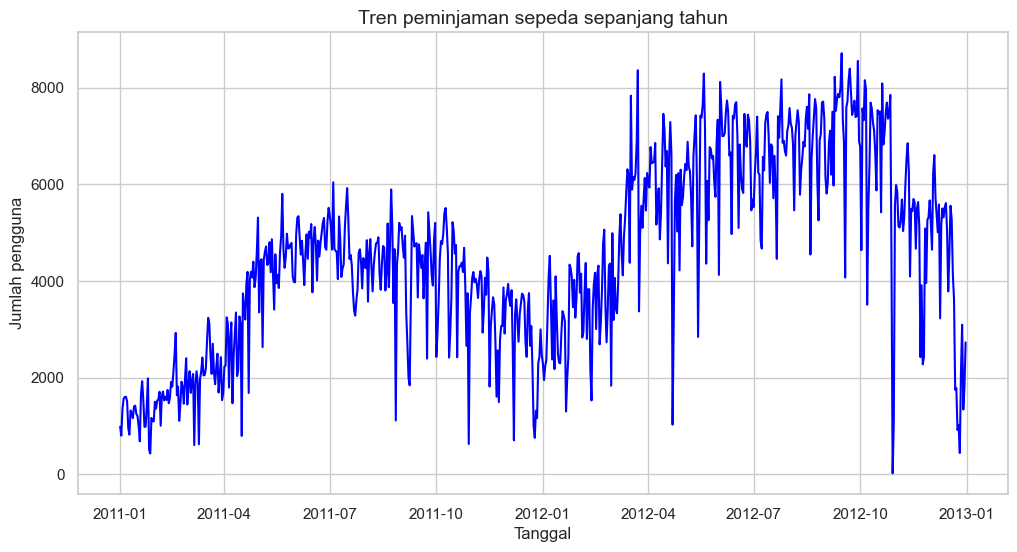

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(x='dteday', y='cnt', data=day_df, color='blue')
plt.title("Tren peminjaman sepeda sepanjang tahun", fontsize=14)
plt.xlabel("Tanggal")
plt.ylabel("Jumlah pengguna")
plt.show()

**Insight:**
Grafik menunjukkan tren peminjaman sepeda yang meningkat sejak awal 2011 hingga akhir 2012, dengan puncak di musim panas. Penggunaan sepeda cenderung menurun di akhir tahun, kemungkinan karena musim dingin. Pola harian yang fluktuatif bisa dipengaruhi oleh cuaca, hari libur, atau faktor lain.

### Explore pengaruh musim terhadap rata-rata jumlah pengguna

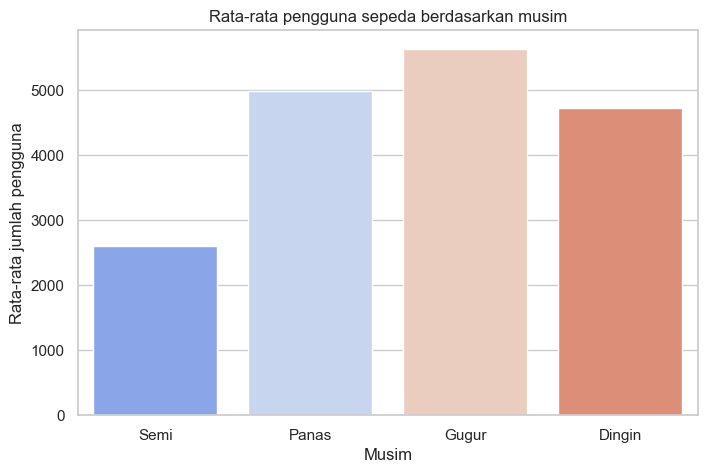

In [23]:
season_mapping = {
    1: "Semi",   #Spring
    2: "Panas",  #Summer
    3: "Gugur",  #Fall
    4: "Dingin"  #Winter
}

season_avg = day_df.groupby('season', as_index=False)['cnt'].mean()
season_avg['season'] = season_avg['season'].map(season_mapping)
plt.figure(figsize=(8,5))
sns.barplot(x='season', y='cnt', data=season_avg, palette='coolwarm')
plt.title("Rata-rata pengguna sepeda berdasarkan musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata jumlah pengguna")
plt.show()

**Insight:**
Peminjaman sepeda paling sedikit di musim dingin, sementara musim panas dan gugur punya pengguna terbanyak. Musim semi juga lebih ramai dibanding musim dingin. Ini menunjukkan cuaca hangat mendorong lebih banyak orang untuk bersepeda.

### Explore pengaruh cuaca terhadap penggunaan sepeda

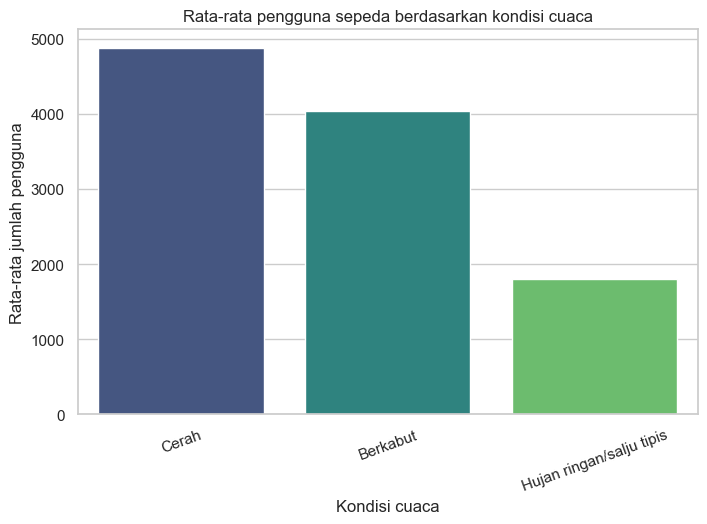

In [24]:
weather_mapping = {
    1: "Cerah",
    2: "Berkabut",
    3: "Hujan ringan/salju tipis"
}

weather_avg = day_df.groupby('weathersit', as_index=False)['cnt'].mean()
weather_avg['weathersit'] = weather_avg['weathersit'].map(weather_mapping)
plt.figure(figsize=(8,5))
sns.barplot(x='weathersit', y='cnt', data=weather_avg, palette='viridis')
plt.title("Rata-rata pengguna sepeda berdasarkan kondisi cuaca")
plt.xlabel("Kondisi cuaca")
plt.ylabel("Rata-rata jumlah pengguna")
plt.xticks(rotation=20)
plt.show()

**Insight:**
Penggunaan sepeda paling banyak saat cuaca cerah, berkurang saat mendung, dan turun drastis saat hujan atau salju. Ini menunjukkan orang lebih suka bersepeda saat cuaca bagus.

### Explore Heatmap Korelasi Variabel

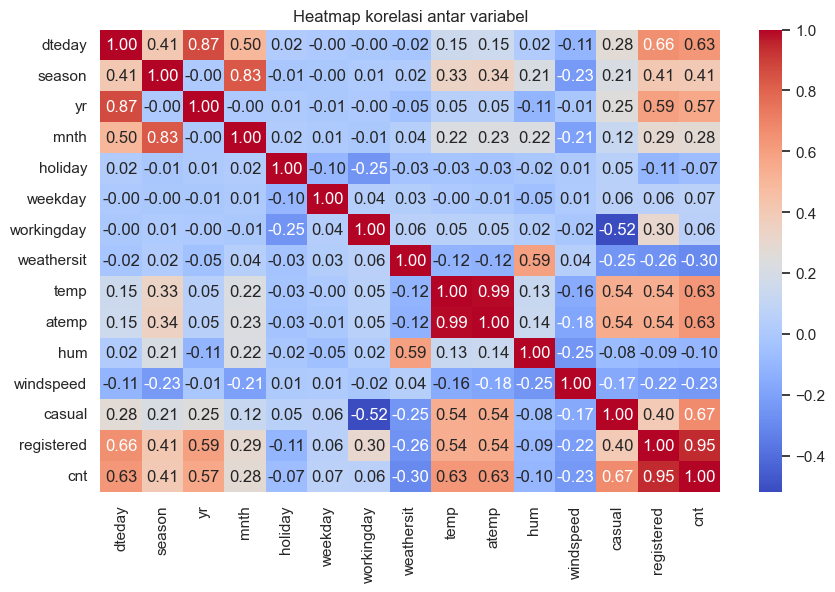

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap korelasi antar variabel")
plt.show()

**Insight:**
Jumlah peminjaman sepeda dipengaruhi oleh suhu dan pengguna terdaftar, sementara cuaca buruk dan angin kencang menguranginya. Musim juga berperan dalam pola penggunaan sepeda.

**Insight Keseluruhan:**
- Penggunaan sepeda mengalami peningkatan di musim panas.
- Penggunaan menurun di musim dingin.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda sepanjang tahun?

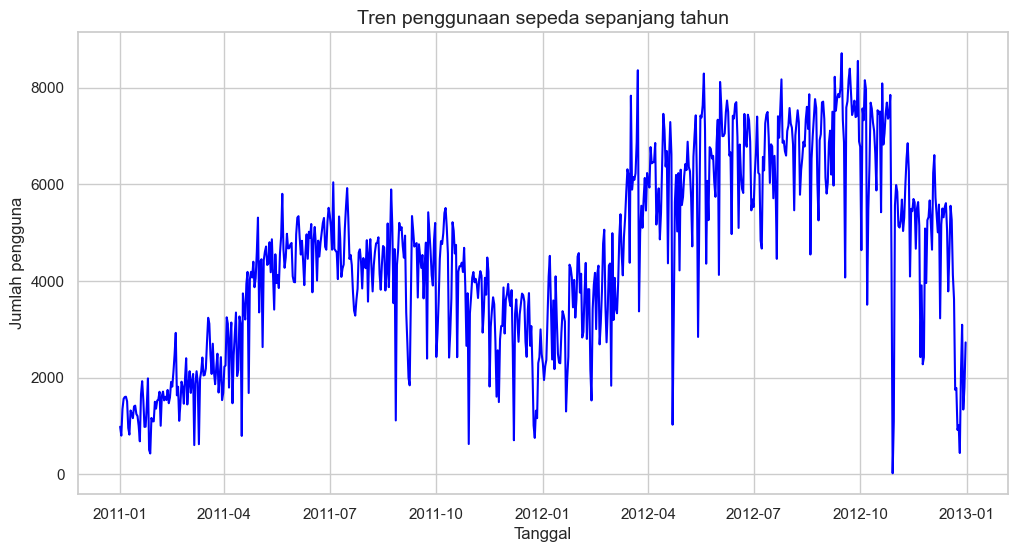

In [26]:
plt.figure(figsize=(12,6))
sns.lineplot(x='dteday', y='cnt', data=day_df, color='blue')
plt.title("Tren penggunaan sepeda sepanjang tahun", fontsize=14)
plt.xlabel("Tanggal")
plt.ylabel("Jumlah pengguna")
plt.show()

**Insight:**
Grafik menunjukkan tren peminjaman sepeda yang meningkat sejak awal 2011 hingga akhir 2012, dengan puncak di musim panas. Penggunaan sepeda cenderung menurun di akhir tahun, kemungkinan karena musim dingin. Pola harian yang fluktuatif bisa dipengaruhi oleh cuaca, hari libur, atau faktor lain

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap rata-rata jumlah pengguna sepeda?

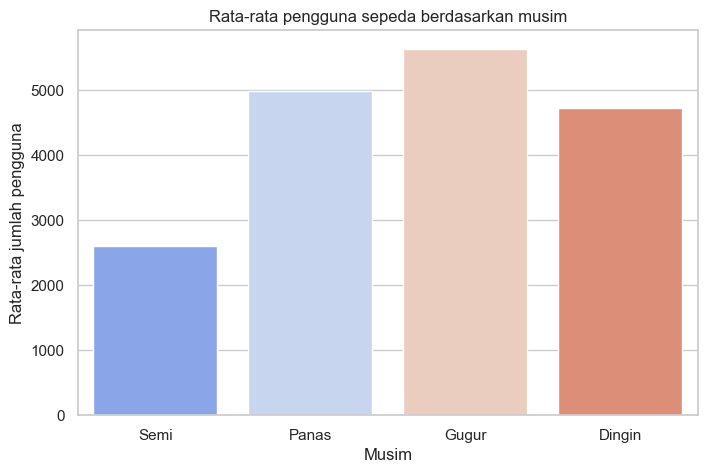

In [27]:
season_mapping = {
    1: "Semi",   #Spring
    2: "Panas",  #Summer
    3: "Gugur",  #Fall
    4: "Dingin"  #Winter
}

season_avg = day_df.groupby('season', as_index=False)['cnt'].mean()
season_avg['season'] = season_avg['season'].map(season_mapping)
plt.figure(figsize=(8,5))
sns.barplot(x='season', y='cnt', data=season_avg, palette='coolwarm')
plt.title("Rata-rata pengguna sepeda berdasarkan musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata jumlah pengguna")
plt.show()

**Insight:**
Penggunaan sepeda paling banyak saat cuaca cerah, berkurang saat mendung, dan turun drastis saat hujan atau salju. Ini menunjukkan orang lebih suka bersepeda saat cuaca bagus.

### RFM Analysis

#### Recency, Frequency, Monetary

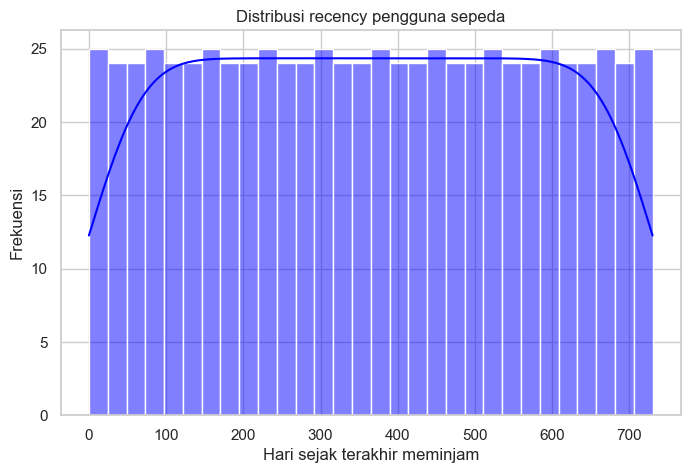

In [28]:
max_date = day_df['dteday'].max()
day_df['recency'] = (max_date - day_df['dteday']).dt.days
day_df['frequency'] = day_df.groupby('dteday')['cnt'].transform('sum')
day_df['monetary'] = day_df['cnt']

plt.figure(figsize=(8,5))
sns.histplot(day_df['recency'], bins=30, kde=True, color='blue')
plt.title("Distribusi recency pengguna sepeda")
plt.xlabel("Hari sejak terakhir meminjam")
plt.ylabel("Frekuensi")
plt.show()

**Insight**
Grafik menunjukkan peminjaman sepeda terjadi secara konsisten. Ada sedikit penurunan di awal dan akhir periode, kemungkinan karena pengguna baru di awal dan aktivitas menurun di akhir.

## Data Merging & Export

In [29]:
day_df.to_csv("dashboard/main_data.csv", index=False)

## Conclusion

- Kesimpulan Pertanyaan 1: Penggunaan sepeda menunjukkan tren musiman dengan peningkatan signifikan selama musim panas dan penurunan drastis di musim dingin. Fluktuasi harian mengindikasikan pengaruh faktor seperti cuaca dan hari libur. Penggunaan sepeda cenderung menurun di akhir tahun, kemungkinan karena musim dingin. Secara keseluruhan, terdapat tren pertumbuhan penggunaan sepeda dari tahun 2011 hingga 2012, mencerminkan meningkatnya minat atau ketersediaan fasilitas yang lebih baik. 
- Kesimpulan Pertanyaan 2: Penggunaan sepeda meningkat di musim panas dan turun di musim dingin. Pada cuaca buruk (hujan/salju) mengurangi jumlah pengguna sepeda secara signifikan.